# Model Performance Comparison

## Metrics : Mean Absolute Error(MAE)
- Calculate on validation set and testing set

In [1]:
# Import usage libraries
import glob
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set font size ofr matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


In [2]:
# Loading the result file into dictionaries object parsed by json
empatica_results = json.load(open('./mae_empatica_results_score_mock.txt'))
fitbit_results = json.load(open('./mae_fitbit_results_score_mock.txt'))


# Plotting into 3 seperate graphs
1. Validation sets
    1. By features : 2 Graphs from 2 devices
    2. By states(from best features of each states) : 1 Graphs(Fitbit Vs. Empatica)
2. Testing sets
    1. By features : 2 Graphs from 2 devices
    2. By states(from best features of each states) : 1 Graphs(Fitbit Vs. Empatica)
    
** Adding the MAE before apply error correction

In [3]:
features_fitbit = [['HR_fitbit'],
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_fitbit'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_fitbit'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit'], 
           ['VectorA_empatica', 'HR_fitbit'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']]

features_empatica = [['HR_empatica'], 
           ['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica'], 
           ['PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['VectorA_empatica', 'HR_empatica'], 
           ['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica'], 
           ['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']]

devices = ['Empatica', 'Fitbit']
states = ['Resting', 'Sleeping', 'Intensity', 'AllStates']

## Testing sets Vs. Validation sets

## Empatica

### 1.A By features

/home/puntawat/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


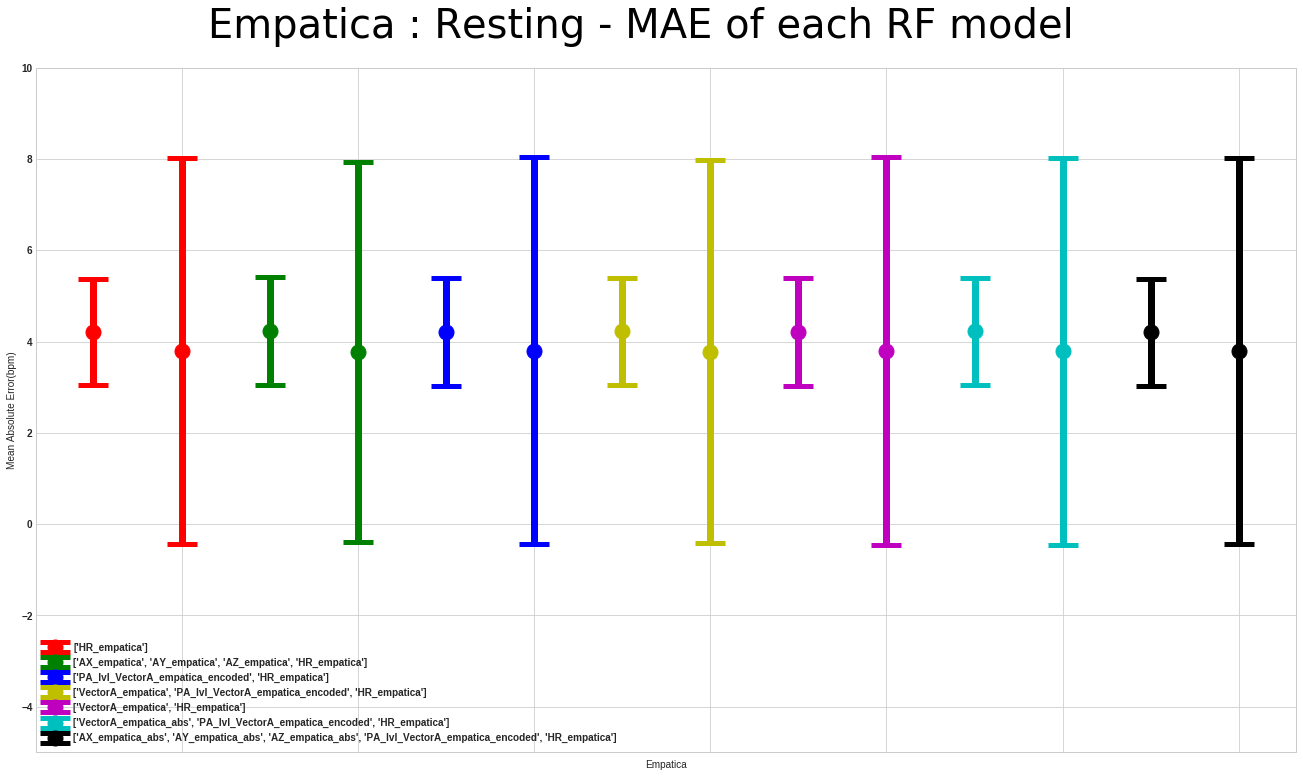

In [4]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Empatica : Resting - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_empatica_feature in features_empatica:
    axes.set_ylim(-5, 10)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['validation_set']['Resting'][str(each_empatica_feature)]['MAE_mean_test_score']), 
                 yerr=empatica_results['validation_set']['Resting'][str(each_empatica_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_empatica_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['testing_set']['Resting'][str(each_empatica_feature)]['MAE_mean_testingset_score']), 
                 yerr=empatica_results['testing_set']['Resting'][str(each_empatica_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Empatica')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/empatica_mae_resting', dpi=96, bbox='tight')

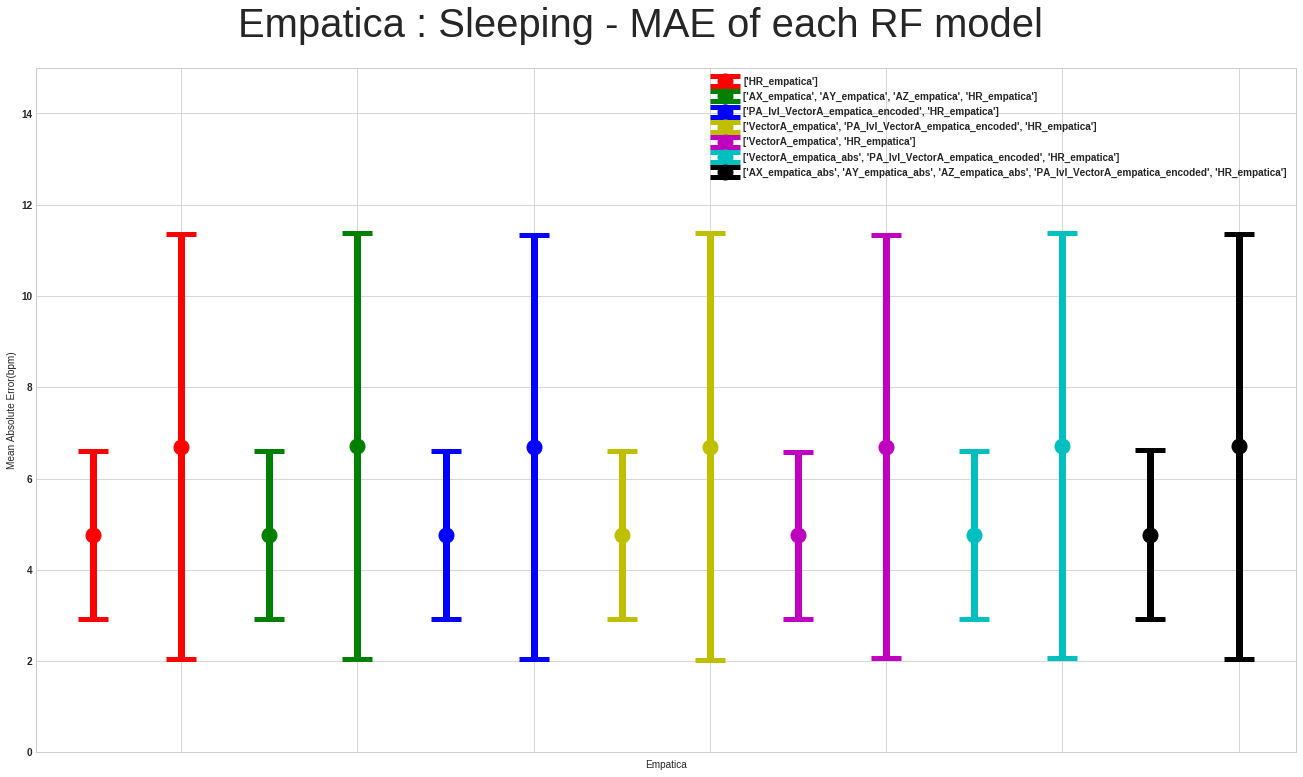

In [5]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Empatica : Sleeping - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_empatica_feature in features_empatica:
    axes.set_ylim(0, 15)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['validation_set']['Sleeping'][str(each_empatica_feature)]['MAE_mean_test_score']), 
                 yerr=empatica_results['validation_set']['Sleeping'][str(each_empatica_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_empatica_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['testing_set']['Sleeping'][str(each_empatica_feature)]['MAE_mean_testingset_score']), 
                 yerr=empatica_results['testing_set']['Sleeping'][str(each_empatica_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Empatica')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/empatica_mae_sleeping', dpi=96, bbox='tight')

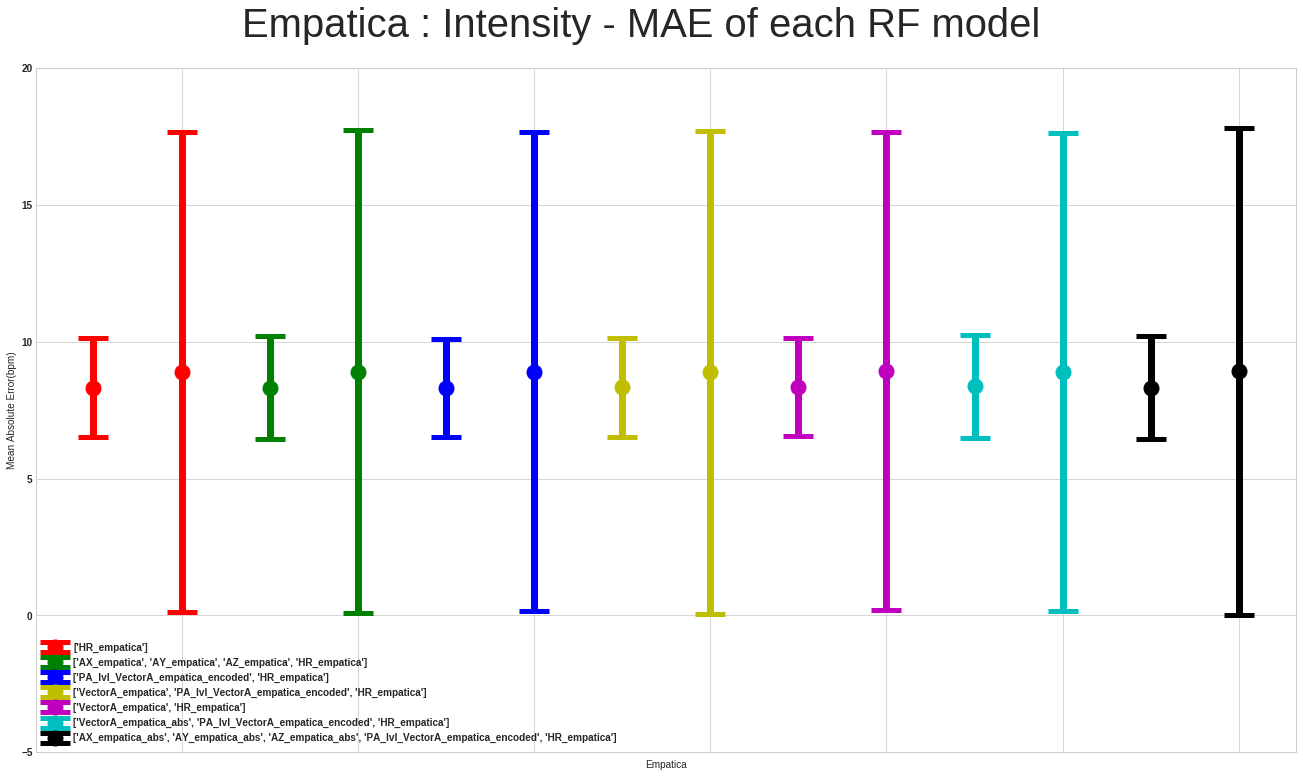

In [6]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Empatica : Intensity - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_empatica_feature in features_empatica:
    axes.set_ylim(-5, 20)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['validation_set']['Intensity'][str(each_empatica_feature)]['MAE_mean_test_score']), 
                 yerr=empatica_results['validation_set']['Intensity'][str(each_empatica_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_empatica_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['testing_set']['Intensity'][str(each_empatica_feature)]['MAE_mean_testingset_score']), 
                 yerr=empatica_results['testing_set']['Intensity'][str(each_empatica_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Empatica')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/empatica_mae_intensity', dpi=96, bbox='tight')

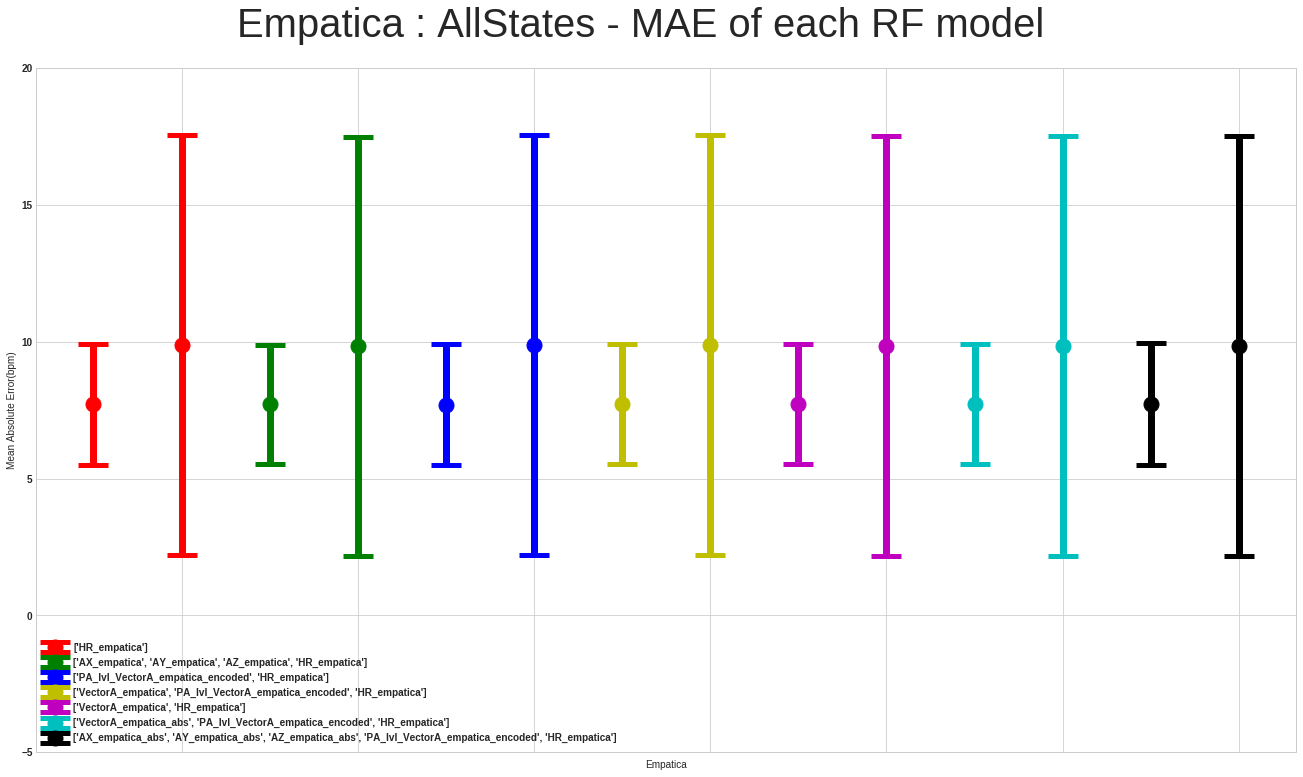

In [7]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Empatica : AllStates - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_empatica_feature in features_empatica:
    axes.set_ylim(-5, 20)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['validation_set']['AllStates'][str(each_empatica_feature)]['MAE_mean_test_score']), 
                 yerr=empatica_results['validation_set']['AllStates'][str(each_empatica_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_empatica_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(empatica_results['testing_set']['AllStates'][str(each_empatica_feature)]['MAE_mean_testingset_score']), 
                 yerr=empatica_results['testing_set']['AllStates'][str(each_empatica_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Empatica')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/empatica_mae_allstates', dpi=96, bbox='tight')

## Fitbit

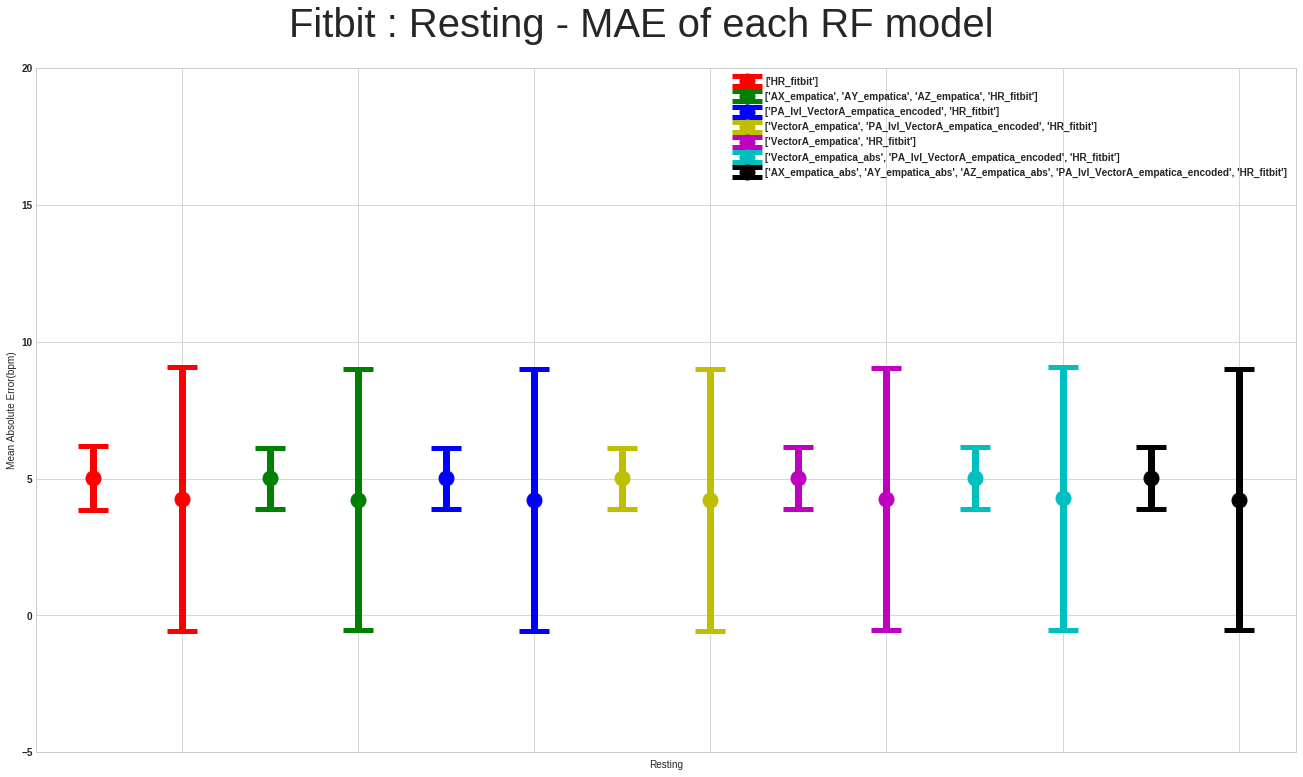

In [8]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Fitbit : Resting - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_fitbit_feature in features_fitbit:
    axes.set_ylim(-5, 20)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['validation_set']['Resting'][str(each_fitbit_feature)]['MAE_mean_test_score']), 
                 yerr=fitbit_results['validation_set']['Resting'][str(each_fitbit_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_fitbit_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['testing_set']['Resting'][str(each_fitbit_feature)]['MAE_mean_testingset_score']), 
                 yerr=fitbit_results['testing_set']['Resting'][str(each_fitbit_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Resting')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/fitbit_mae_resting', dpi=96, bbox='tight')

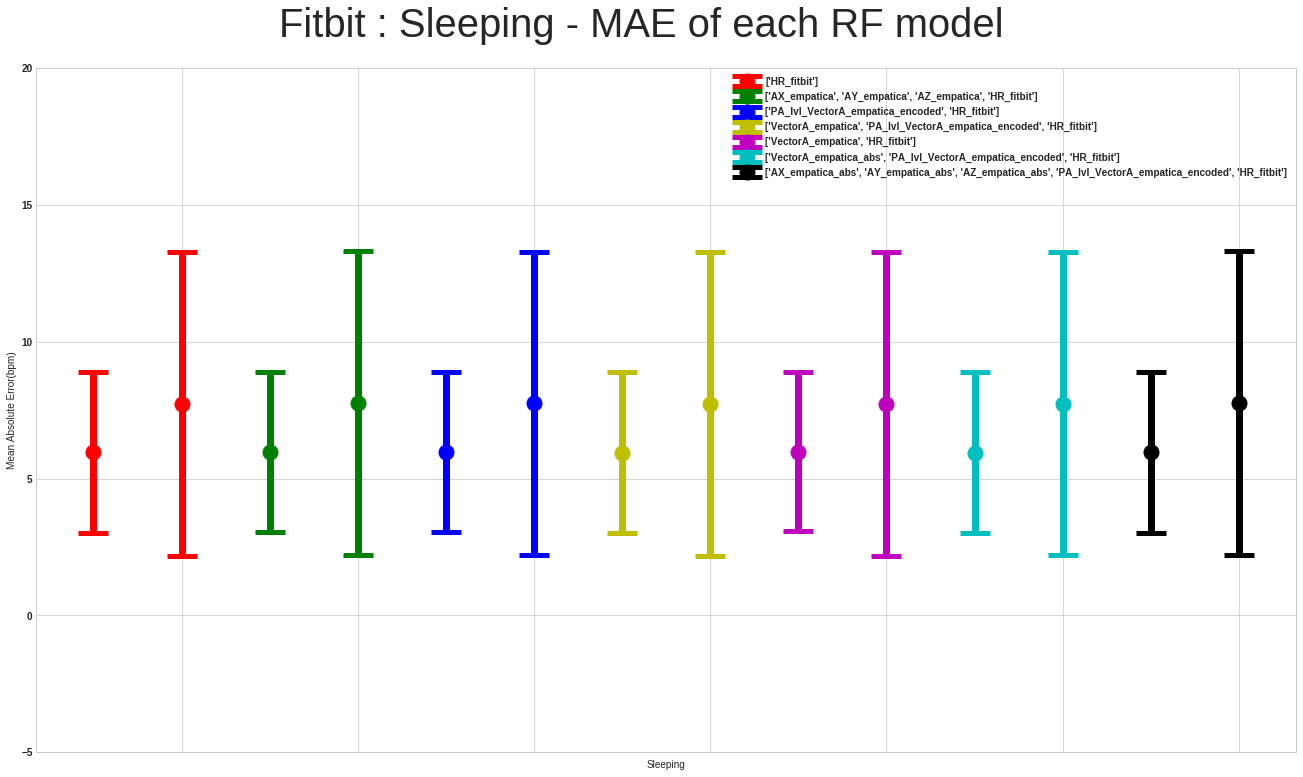

In [9]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Fitbit : Sleeping - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_fitbit_feature in features_fitbit:
    axes.set_ylim(-5, 20)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['validation_set']['Sleeping'][str(each_fitbit_feature)]['MAE_mean_test_score']), 
                 yerr=fitbit_results['validation_set']['Sleeping'][str(each_fitbit_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_fitbit_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['testing_set']['Sleeping'][str(each_fitbit_feature)]['MAE_mean_testingset_score']), 
                 yerr=fitbit_results['testing_set']['Sleeping'][str(each_fitbit_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Sleeping')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/fitbit_mae_sleeping', dpi=96, bbox='tight')

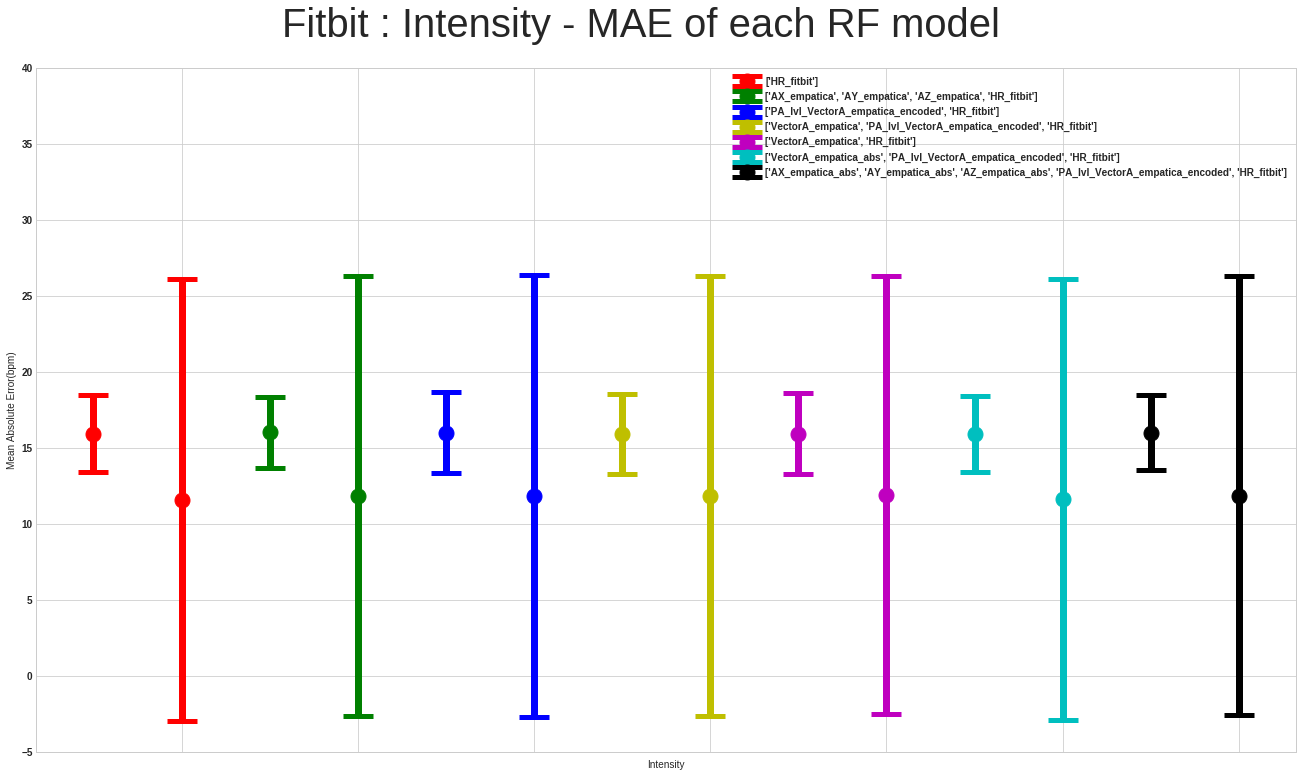

In [10]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Fitbit : Intensity - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_fitbit_feature in features_fitbit:
    axes.set_ylim(-5, 40)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['validation_set']['Intensity'][str(each_fitbit_feature)]['MAE_mean_test_score']), 
                 yerr=fitbit_results['validation_set']['Intensity'][str(each_fitbit_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_fitbit_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['testing_set']['Intensity'][str(each_fitbit_feature)]['MAE_mean_testingset_score']), 
                 yerr=fitbit_results['testing_set']['Intensity'][str(each_fitbit_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('Intensity')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/fitbit_mae_intensity', dpi=96, bbox='tight')

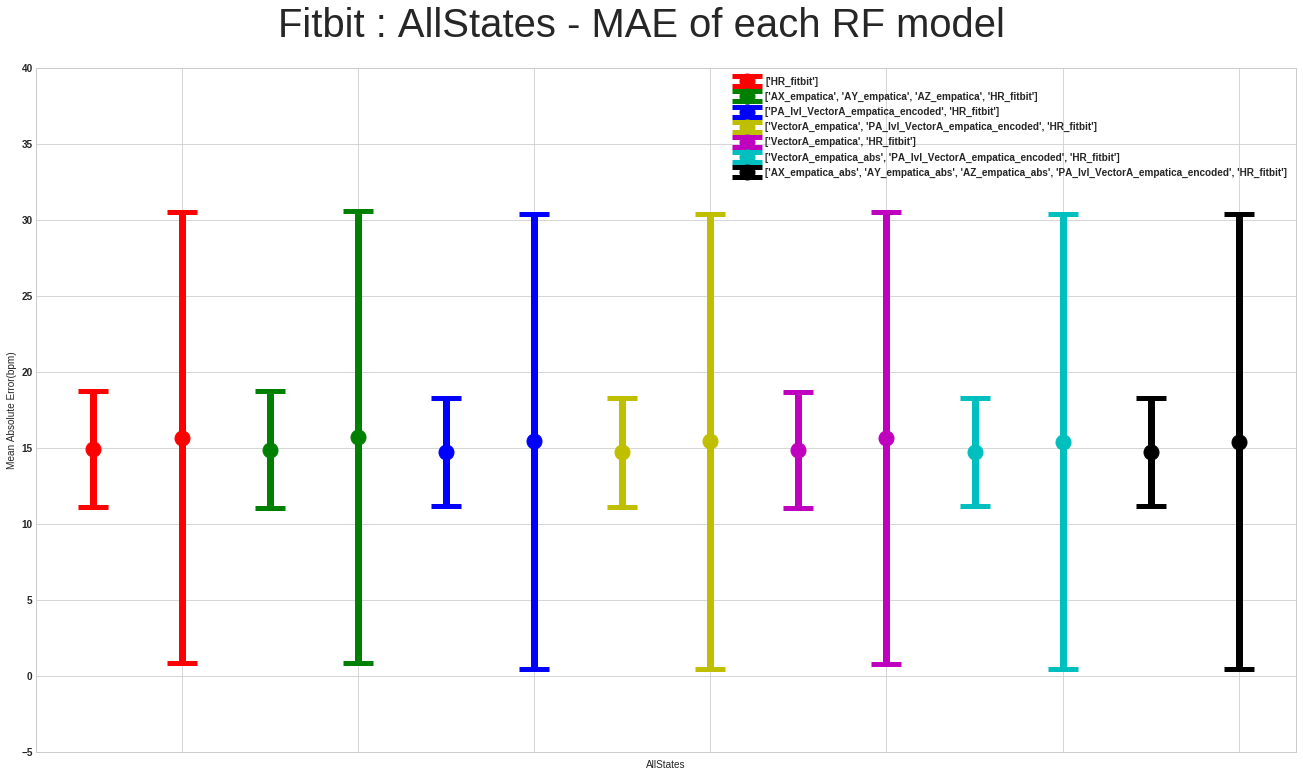

In [11]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Fitbit : AllStates - MAE of each RF model', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for each_fitbit_feature in features_fitbit:
    axes.set_ylim(-5, 40)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['validation_set']['AllStates'][str(each_fitbit_feature)]['MAE_mean_test_score']), 
                 yerr=fitbit_results['validation_set']['AllStates'][str(each_fitbit_feature)]['MAE_std_test_score'], 
                 fmt='o', linestyle=None, label = str(each_fitbit_feature), linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    (_, caps, _) = plt.errorbar(x = ptr+1, y = np.abs(fitbit_results['testing_set']['AllStates'][str(each_fitbit_feature)]['MAE_mean_testingset_score']), 
                 yerr=fitbit_results['testing_set']['AllStates'][str(each_fitbit_feature)]['MAE_std_testingset_score'], 
                 fmt='o', linestyle=None, linewidth=7, markersize=15, capsize=15, 
                 axes=axes, color=color[i])
    axes.set_xlabel('AllStates')
    axes.set_ylabel('Mean Absolute Error(bpm)')
    axes.set_xticklabels([])

    ptr = ptr + 1
    for cap in caps:
        cap.set_markeredgewidth(5)
    i = i + 1
    
    plt.legend()
fig.savefig('./MAE/fitbit_mae_allstates', dpi=96, bbox='tight')

## Finding the best features from each model (By testing set)

### Best features for each state

In [12]:
# Dictionary to store all the best value of each model
best_MAE_mean_testingset_score = {'Fitbit' : {'Resting':{}, 'Sleeping':{}, 'Intensity':{}, 'AllStates':{}}, 
                                 'Empatica' : {'Resting':{}, 'Sleeping':{}, 'Intensity':{}, 'AllStates':{}}}

In [13]:
# Function to find value in nested dictionaries
def find_mime_type(d, mime_type):
    reverse_linked_q = list()
    reverse_linked_q.append((list(), d))
    while reverse_linked_q:
        this_key_chain, this_v = reverse_linked_q.pop()
        # finish search if found the mime type
        if this_v == mime_type:
            return this_key_chain
        # not found. keep searching
        # queue dicts for checking / ignore anything that's not a dict
        try:
            items = this_v.items()
        except AttributeError:
            continue  # this was not a nested dict. ignore it
        for k, v in items:
            reverse_linked_q.append((this_key_chain + [k], v))
    # if we haven't returned by this point, we've exhausted all the contents
    raise KeyError

### Find minimun MAE_mean_testing score from every devices(Fitbit, Empatica)

In [16]:
# Minimum Fitbit MAE_mean_testingset_score
temp_min_mean_score_each_state_fitbit = []
min_mean_score_every_state_fitbit = []
for each_state in states:
    for each_fitbit_feature in features_fitbit:
        temp_min_mean_score_each_state_fitbit.append(fitbit_results['testing_set'][each_state][str(each_fitbit_feature)]['MAE_mean_testingset_score'])
        #print(empatica_results['testing_set'][each_state][str(each_empatica_feature)])
    min_mean_score_every_state_fitbit.append(min(temp_min_mean_score_each_state_fitbit))
    temp_min_mean_score_each_state_fitbit = []
    
i = 0
for each_min_in_each_state in min_mean_score_every_state_fitbit:
    best_MAE_mean_testingset_score['Fitbit'][states[i]] = {find_mime_type(fitbit_results['testing_set'], each_min_in_each_state)[1] : {}}
    i = i + 1
print(best_MAE_mean_testingset_score)

{'Fitbit': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_fitbit']": {}}, 'Sleeping': {"['HR_fitbit']": {}}, 'Intensity': {"['HR_fitbit']": {}}, 'AllStates': {"['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {}}}, 'Empatica': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {}}, 'Sleeping': {"['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {}}, 'Intensity': {"['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {}}, 'AllStates': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {}}}}


In [17]:
# Minimum Empatica MAE_mean_testingset_score
temp_min_mean_score_each_state_empatica = []
min_mean_score_every_state_empatica = []
min_feature_name_empatica = []
for each_state in states:
    for each_empatica_feature in features_empatica:
        temp_min_mean_score_each_state_empatica.append(empatica_results['testing_set'][each_state][str(each_empatica_feature)]['MAE_mean_testingset_score'])
        #print(empatica_results['testing_set'][each_state][str(each_empatica_feature)])
    min_mean_score_every_state_empatica.append(min(temp_min_mean_score_each_state_empatica))
    temp_min_mean_score_each_state_empatica = []

i = 0
for each_min_in_each_state in min_mean_score_every_state_empatica:
    best_MAE_mean_testingset_score['Empatica'][states[i]] = {find_mime_type(empatica_results['testing_set'], each_min_in_each_state)[1] : {}}
    i = i + 1
#empatica_results['testing_set'][each_state][y[1]]['MAE_mean_testingset_score']
print(best_MAE_mean_testingset_score)

{'Fitbit': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_fitbit']": {}}, 'Sleeping': {"['HR_fitbit']": {}}, 'Intensity': {"['HR_fitbit']": {}}, 'AllStates': {"['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {}}}, 'Empatica': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {}}, 'Sleeping': {"['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {}}, 'Intensity': {"['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {}}, 'AllStates': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {}}}}


### Copy the minimum MAE score to the dictionaries that contain the best features from each state

In [18]:
for each_state in states:
    for each_empatica_feature in features_empatica:
        if str(list(best_MAE_mean_testingset_score['Empatica'][each_state].keys())[0]) == str(each_empatica_feature):
            best_MAE_mean_testingset_score['Empatica'][each_state][str(each_empatica_feature)]['MAE_mean_testingset_score'] = empatica_results['testing_set'][each_state][str(each_empatica_feature)]['MAE_mean_testingset_score']
            best_MAE_mean_testingset_score['Empatica'][each_state][str(each_empatica_feature)]['MAE_std_testingset_score'] = empatica_results['testing_set'][each_state][str(each_empatica_feature)]['MAE_std_testingset_score']            
    for each_fitbit_feature in features_fitbit:
        if str(list(best_MAE_mean_testingset_score['Fitbit'][each_state].keys())[0]) == str(each_fitbit_feature):
            best_MAE_mean_testingset_score['Fitbit'][each_state][str(each_fitbit_feature)]['MAE_mean_testingset_score'] = fitbit_results['testing_set'][each_state][str(each_fitbit_feature)]['MAE_mean_testingset_score']
            best_MAE_mean_testingset_score['Fitbit'][each_state][str(each_fitbit_feature)]['MAE_std_testingset_score'] = fitbit_results['testing_set'][each_state][str(each_fitbit_feature)]['MAE_std_testingset_score']

### Best MAE mean testingset score

In [19]:
best_MAE_mean_testingset_score

{'Fitbit': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_fitbit']": {'MAE_mean_testingset_score': 4.222023208748053,
    'MAE_std_testingset_score': 4.7602244391515045}},
  'Sleeping': {"['HR_fitbit']": {'MAE_mean_testingset_score': 7.725100593111837,
    'MAE_std_testingset_score': 5.563250428151532}},
  'Intensity': {"['HR_fitbit']": {'MAE_mean_testingset_score': 11.592807088449286,
    'MAE_std_testingset_score': 14.541899999999998}},
  'AllStates': {"['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {'MAE_mean_testingset_score': 15.41833393470864,
    'MAE_std_testingset_score': 14.948706438812385}}},
 'Empatica': {'Resting': {"['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {'MAE_mean_testingset_score': 3.7733841931923533,
    'MAE_std_testingset_score': 4.172579600035284}},
  'Sleeping': {"['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_mean_testingset_score':

## Plotting each best feature from each state

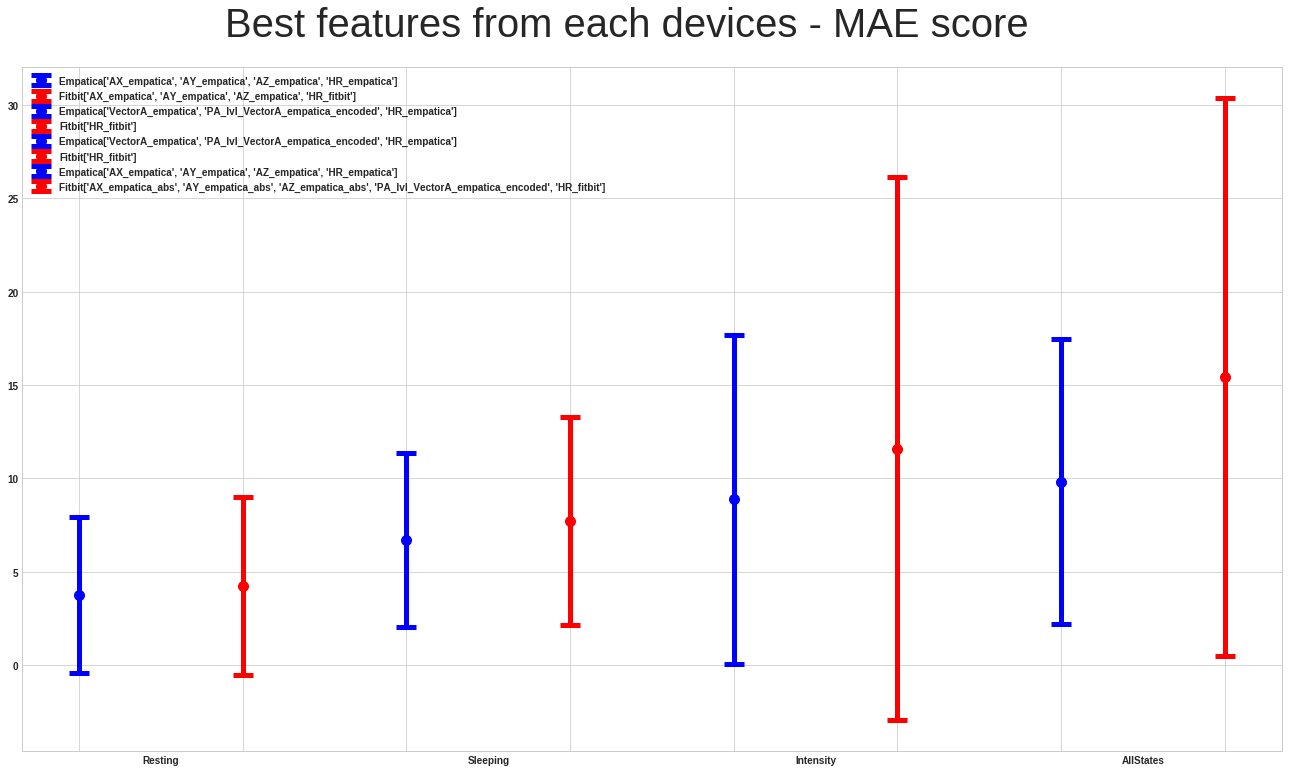

In [20]:
my_dpi = 96
fig = plt.figure(figsize=(1920/my_dpi, 1080/my_dpi))
plt.suptitle('Best features from each devices - MAE score', fontsize=40)
plt.subplots_adjust(top=0.905,
bottom=0.06,
left=0.08,
right=0.955,
hspace=0.225,
wspace=0.155)
i = 0
ptr = 0
plt.style.use('seaborn-whitegrid')
axes = plt.subplot(1, 1, 1)
color = ['b', 'r']
pos_label_plot = [0.5, 2.5, 4.5, 6.5]
for each_state in states:
    axes.set_xticks([1.5, 2.5], ['asd', 'asds'])

    for each_device in devices:
        for key, value in best_MAE_mean_testingset_score[each_device][each_state].items():
            axes.xaxis.set_major_formatter(ticker.NullFormatter())
            axes.xaxis.set_minor_locator(ticker.FixedLocator(pos_label_plot))
            axes.xaxis.set_minor_formatter(ticker.FixedFormatter(states))

            (_, caps, _) = plt.errorbar(x=i, y=value['MAE_mean_testingset_score'], yerr=value['MAE_std_testingset_score'], axes=axes, 
                                        fmt='o', markersize=10, linewidth=5, capsize=10, label=each_device + key, color=color[i%2])
            i = i + 1
            for cap in caps:
                cap.set_markeredgewidth(5)
            plt.legend()
            #print('{2} => {0} : {1}'.format(key, value, each_state))
            #print(value['MAE_std_testingset_score'])
fig.savefig('./MAE/best_features_mae', dpi=96, bbox='tight')

In [21]:
fitbit_results['testing_set']

{'Resting': {"['HR_fitbit']": {'MAE_std_testingset_score': 4.8306679685116185,
   'MAE_mean_testingset_score': 4.249061431776484},
  "['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_fitbit']": {'MAE_std_testingset_score': 4.7602244391515045,
   'MAE_mean_testingset_score': 4.222023208748053},
  "['PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {'MAE_std_testingset_score': 4.78495029587853,
   'MAE_mean_testingset_score': 4.2244351203861585},
  "['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {'MAE_std_testingset_score': 4.777517301836911,
   'MAE_mean_testingset_score': 4.225799176754794},
  "['VectorA_empatica', 'HR_fitbit']": {'MAE_std_testingset_score': 4.782880135800131,
   'MAE_mean_testingset_score': 4.25003816990805},
  "['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_fitbit']": {'MAE_std_testingset_score': 4.807588059069097,
   'MAE_mean_testingset_score': 4.283324377357209},
  "['AX_empatica_abs', 'AY_empatica_abs', 'AZ_empatica_abs',

In [22]:
empatica_results['testing_set']

{'Resting': {"['HR_empatica']": {'MAE_std_testingset_score': 4.224524281106521,
   'MAE_mean_testingset_score': 3.791897899738011},
  "['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {'MAE_std_testingset_score': 4.172579600035284,
   'MAE_mean_testingset_score': 3.7733841931923533},
  "['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.238113942745856,
   'MAE_mean_testingset_score': 3.802783379140145},
  "['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.203451839332583,
   'MAE_mean_testingset_score': 3.7833515313444583},
  "['VectorA_empatica', 'HR_empatica']": {'MAE_std_testingset_score': 4.247390485295447,
   'MAE_mean_testingset_score': 3.7942812144355536},
  "['VectorA_empatica_abs', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_std_testingset_score': 4.242987180288423,
   'MAE_mean_testingset_score': 3.788568781741525},
  "['AX_empatica_abs', 'AY_empatica_abs', 'AZ_

In [23]:
empatica_results['validation_set']

{'Resting': {"['HR_empatica']": {'MAE_mean_test_score': -4.207231206851669,
   'MAE_std_test_score': 1.1617835154152165,
   'MAE_mean_train_score': -4.044293695711818,
   'MAE_std_train_score': 0.10013948489377054},
  "['AX_empatica', 'AY_empatica', 'AZ_empatica', 'HR_empatica']": {'MAE_mean_test_score': -4.236573390689318,
   'MAE_std_test_score': 1.1803908742136704,
   'MAE_mean_train_score': -4.048183803216872,
   'MAE_std_train_score': 0.10192275955348637},
  "['PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_mean_test_score': -4.220940754298413,
   'MAE_std_test_score': 1.1839377155278437,
   'MAE_mean_train_score': -4.043376768236697,
   'MAE_std_train_score': 0.10723591577291582},
  "['VectorA_empatica', 'PA_lvl_VectorA_empatica_encoded', 'HR_empatica']": {'MAE_mean_test_score': -4.2250569153662765,
   'MAE_std_test_score': 1.1729517103010614,
   'MAE_mean_train_score': -4.052188626928273,
   'MAE_std_train_score': 0.10266877440202744},
  "['VectorA_empatica', 'HR_empat